In [24]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import time
import mlxtend.frequent_patterns
from mlxtend.frequent_patterns import fpgrowth
import matplotlib as plt
from mlxtend.frequent_patterns import association_rules

### Association Rules

In [30]:
def load_transactions (file_name, sep='\t'):
    lines = open(file_name, 'rt').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

In [31]:
biotargets=load_transactions("acts.txt", sep="\t")

for i in biotargets:
    i.pop(0)

len(biotargets)

1101

In [32]:
#Compute binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(biotargets).transform(biotargets)
biotargets_df = pd.DataFrame(trans_array, columns=tr_enc.columns_)
biotargets_df.drop(biotargets_df.columns[0], axis=1, inplace=True)

In [33]:
molecular_labels = pd.read_csv("molecular_labels.csv", header=None)
mlabels_df = pd.DataFrame(molecular_labels)
mlabels_df.columns= ["Molecules"]

In [34]:
biotargets_df = biotargets_df.T
biotargets_df.columns = mlabels_df["Molecules"]
biotargets_df = biotargets_df.T

In [35]:
biotargets_df

,5HTR1D,AADAC,AAK1,ABAT,ABCB1,ABCB11,ABCB1A,ABCB1B,ABCC1,ABCC2,...,VDRA,VIM-2,VKORC1,VRK2,WEE1,WEE2,XBP1,XDH,YES1,ZAP70
Molecules,,,,,,,,,,,,,,,,,,,,,
PDFDA0001,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA0002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA0003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA0004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA0005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDFDA1097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA1098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PDFDA1099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Testing

In [13]:
#biotargets_df[biotargets_df["PDFDA0001"] == True]

In [130]:
FI_fpgrowth = fpgrowth(biotargets_df, min_support=0.02, use_colnames=True)

In [131]:
FI_fpgrowth['length'] = FI_fpgrowth['itemsets'].apply(lambda x: len(x))
FI_fpgrowth_filt = FI_fpgrowth[FI_fpgrowth['length'] > 2]
FI_fpgrowth_filt.sort_values(['support'],ascending=False).groupby('length').head(10)

,support,itemsets,length
162,0.151680,"(SLCO1B1, REP, SLCO1B3)",3
109,0.099909,"(LMNA, SLCO1B1, SLCO1B3)",3
4256,0.076294,"(SLCO2B1, SLCO1B1, SLCO1B3)",3
167,0.064487,"(CYP3A4, SLCO1B1, SLCO1B3)",3
382,0.054496,"(HTR2A, HTR2C, HTR2B)",3
...,...,...,...
20307,0.021798,"(DRD3, HTR2A, ADRA1B, DRD1, HTR2C, ADRA1D, ADR...",12
16219,0.021798,"(DRD3, HTR2A, DRD1, DRD2, HTR6, HTR2C, ADRA1D,...",12
19667,0.021798,"(DRD3, HTR2A, ADRA1B, DRD1, DRD2, HTR6, HTR2C,...",12
19793,0.021798,"(DRD3, HTR2A, ADRA1B, DRD2, HTR6, HTR2C, ADRA1...",12


In [132]:
rules = association_rules(FI_fpgrowth, metric="confidence", min_threshold=0.8)

In [45]:
print("Rules with a minimum confidence of 70%:", len(FI_fpgrowth))
print("Top 10 rules with greater support:")
rules.sort_values(by=['support'], ascending=False).head(10)

Rules with a minimum confidence of 70%: 53063
Top 10 rules with greater support:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(SLCO1B1),(SLCO1B3),0.306085,0.305177,0.297911,0.973294,3.189275,0.204501,26.017257
36,(SLCO1B3),(SLCO1B1),0.305177,0.306085,0.297911,0.976190,3.189275,0.204501,29.144414
38,"(SLCO1B3, REP)",(SLCO1B1),0.153497,0.306085,0.151680,0.988166,3.228399,0.104697,58.635786
37,"(SLCO1B1, REP)",(SLCO1B3),0.156222,0.305177,0.151680,0.970930,3.181530,0.104005,23.901907
7,"(LMNA, SLCO1B1)",(SLCO1B3),0.102634,0.305177,0.099909,0.973451,3.189791,0.068588,26.171662
8,"(LMNA, SLCO1B3)",(SLCO1B1),0.102634,0.306085,0.099909,0.973451,3.180326,0.068494,26.137451
101581,(SLCO2B1),(SLCO1B3),0.087193,0.305177,0.080836,0.927083,3.037853,0.054226,9.529000
101582,(SLCO2B1),(SLCO1B1),0.087193,0.306085,0.080836,0.927083,3.028839,0.054147,9.516543
101585,(SLCO2B1),"(SLCO1B1, SLCO1B3)",0.087193,0.297911,0.076294,0.875000,2.937119,0.050318,5.616712
101584,"(SLCO2B1, SLCO1B3)",(SLCO1B1),0.080836,0.306085,0.076294,0.943820,3.083519,0.051552,12.351680


In [77]:
print("Top 10 rules with greater confidence:")
rules.sort_values(by=['confidence'], ascending=False).head(10)

Top 10 rules with greater confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_length,cons_length
1977284,"(DRD2, CHRM2, CHRM1, HTR2B, DRD1)","(HTR2A, DRD3, CHRM4, ADRA2A)",0.020890,0.030881,0.020890,1.0,32.382353,0.020245,inf,5,4
2208225,"(CHRM3, DRD3, SLC6A2, HTR6, HTR2C, CHRM1, ADRA2A)",(CHRM2),0.020890,0.051771,0.020890,1.0,19.315789,0.019809,inf,7,1
861999,"(ADRA1B, HTR6, ADRA1D, ADRA2C, ADRA1A, DRD1)","(HTR2A, DRD3, ADRA2B)",0.024523,0.042688,0.024523,1.0,23.425532,0.023476,inf,6,3
421161,"(DRD1, DRD2, HTR6, HTR2C, ADRA2A, HTR1A)",(HTR2B),0.024523,0.076294,0.024523,1.0,13.107143,0.022652,inf,6,1
1635885,"(SLC6A2, HTR2A, HTR2C, CHRM2, ADRA2A, ADRA2B)","(CHRM1, CHRM4, HTR2B)",0.022707,0.032698,0.022707,1.0,30.583333,0.021964,inf,6,3
862000,"(ADRA1B, HTR6, ADRA1D, ADRA2C, ADRA2B, DRD1)","(HTR2A, DRD3, ADRA1A)",0.024523,0.039964,0.024523,1.0,25.022727,0.023543,inf,6,3
3256447,"(DRD3, ADRA2C, DRD2, HTR2B, ADRA1D)","(ADRA1A, ADRA1B, ADRA2A)",0.027248,0.044505,0.027248,1.0,22.469388,0.026035,inf,5,3
1635900,"(SLC6A2, CHRM4, HTR2C, CHRM2, ADRA2A, ADRA2B)","(HTR2A, CHRM1, HTR2B)",0.022707,0.037239,0.022707,1.0,26.853659,0.021861,inf,6,3
1635912,"(SLC6A2, HTR2C, CHRM2, CHRM1, ADRA2A, ADRA2B)","(HTR2A, CHRM4, HTR2B)",0.022707,0.033606,0.022707,1.0,29.756757,0.021944,inf,6,3
1635913,"(SLC6A2, HTR2C, CHRM2, HTR2B, ADRA2A, ADRA2B)","(HTR2A, CHRM1, CHRM4)",0.022707,0.034514,0.022707,1.0,28.973684,0.021923,inf,6,3


In [76]:
print("Top 10 rules with greater lift:")
rules.sort_values(by=['lift'], ascending=False).head(10)

Top 10 rules with greater lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_length,cons_length
2337554,"(SLC6A2, CHRM4, ADRA1D, HTR6)","(CHRM3, DRD3, CHRM2, HTR2B, ADRA2A, ADRA2B)",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,4,6
2336655,"(SLC6A2, CHRM2, CHRM1, ADRA1D, HTR2B)","(CHRM3, DRD3, CHRM4, HTR6, ADRA2A)",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,5,5
2787980,"(SLC6A2, HTR2A, DRD1, CHRM2, ADRA2B)","(CHRM3, DRD3, HTR6, HTR2B, ADRA2A)",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,5,5
2787999,"(SLC6A2, DRD1, CHRM2, HTR2B, ADRA2B)","(CHRM3, DRD3, HTR2A, HTR6, ADRA2A)",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,5,5
2336690,"(CHRM3, DRD3, ADRA2A, HTR6)","(SLC6A2, CHRM4, CHRM2, CHRM1, HTR2B, ADRA1D)",0.022707,0.020890,0.02089,0.92,44.04,0.020416,12.238874,4,6
2353350,"(SLC6A2, CHRM4, HTR6, CHRM1, ADRA1D)","(CHRM3, DRD3, HTR2A, CHRM2, HTR2B, ADRA2A, ADR...",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,5,7
2811921,"(SLC6A2, DRD1, CHRM2, CHRM1, ADRA2B)","(CHRM3, DRD3, HTR2A, HTR6, HTR2B, ADRA2A)",0.020890,0.022707,0.02089,1.00,44.04,0.020416,inf,5,6
2788038,"(CHRM3, DRD3, ADRA2A, HTR6)","(SLC6A2, HTR2A, CHRM2, HTR2B, ADRA2B, DRD1)",0.022707,0.020890,0.02089,0.92,44.04,0.020416,12.238874,4,6
2800183,"(CHRM3, DRD3, HTR6, CHRM1, ADRA2A)","(SLC6A2, CHRM4, CHRM2, ADRA2B, DRD1)",0.022707,0.020890,0.02089,0.92,44.04,0.020416,12.238874,5,5
2800169,"(CHRM3, DRD3, CHRM4, HTR6, ADRA2A)","(SLC6A2, CHRM2, CHRM1, ADRA2B, DRD1)",0.022707,0.020890,0.02089,0.92,44.04,0.020416,12.238874,5,5


In [79]:
rules['ante_length'] = rules['antecedents'].apply(lambda x: len(x))
rules['cons_length'] = rules['consequents'].apply(lambda x: len(x))

In [87]:
rules.sort_values(['support','confidence','lift'],ascending=False).groupby('ante_length').head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_length,cons_length
36,(SLCO1B3),(SLCO1B1),0.305177,0.306085,0.297911,0.976190,3.189275,0.204501,29.144414,1,1
35,(SLCO1B1),(SLCO1B3),0.306085,0.305177,0.297911,0.973294,3.189275,0.204501,26.017257,1,1
38,"(SLCO1B3, REP)",(SLCO1B1),0.153497,0.306085,0.151680,0.988166,3.228399,0.104697,58.635786,2,1
37,"(SLCO1B1, REP)",(SLCO1B3),0.156222,0.305177,0.151680,0.970930,3.181530,0.104005,23.901907,2,1
7,"(LMNA, SLCO1B1)",(SLCO1B3),0.102634,0.305177,0.099909,0.973451,3.189791,0.068588,26.171662,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1156457,"(DRD3, HTR2A, ADRA1B, DRD2, HTR6, HTR2C, ADRA1...",(HTR2B),0.021798,0.076294,0.021798,1.000000,13.107143,0.020135,inf,12,1
1156455,"(DRD3, ADRA2B, HTR2A, ADRA1B, DRD2, HTR6, HTR2...",(ADRA2A),0.021798,0.077203,0.021798,1.000000,12.952941,0.020115,inf,12,1
1156465,"(DRD3, ADRA2B, ADRA1B, DRD2, HTR6, HTR2C, ADRA...",(HTR2A),0.021798,0.080836,0.021798,1.000000,12.370787,0.020036,inf,12,1
1156463,"(DRD3, HTR2A, ADRA1B, DRD2, HTR6, HTR2C, ADRA1...",(DRD1),0.022707,0.055404,0.021798,0.960000,17.327213,0.020540,23.614896,12,1


Ordenado pela confiança os valores apresentados são todos 1 e conviction infinita. Ordenado pelo suporte conseguimos inferir sobre os resultados de forma mais ponderada.

Tendo em conta os valores de suporte, escolhemos analisar regras:

 * (SLCO1B3) -->(SLCO1B1)	
 * (SLCO1B1) -->(SLCO1B3)	

 * (SLCO1B3, REP) --> (SLCO1B1) 
 * (SLCO1B1, REP) --> (SLCO1B3) 

 * (LMNA, SLCO1B1) --> (SLCO1B3) 
 * (LMNA, SLCO1B3) --> (SLCO1B1)

 <br>

A ocorrência da ligação do fármaco com os binding sites SLCO1B1 SLCO1B3 parece estar correlacionada. Ao ocorrer a ligação num site tambem ocorrerá no outro. <p> Os sites REP e LMNA aparentam ser intermediários para estabilizar as ligações com os sites do tipo SLCO1. Um fármaco para se ligar aos sites do tipo SLCO1 liga-se antes ou ao REP ou ao LMNA.

Assim, iremos realizar uma análise exploratória destes sites de modo a tentar perceber a forma de como se encontram relacionados.

**Quais as moléculas que possuem todos estes targets (binding sites)?**

In [125]:
find_targets = biotargets_df[biotargets_df['SLCO1B1'] & biotargets_df['SLCO1B3'] & biotargets_df['LMNA'] & biotargets_df['REP'] == True]

mol_sel_target = find_targets[['SLCO1B1','SLCO1B3','LMNA','REP']]

print("\nThe targets are active in ", len(mol_sel_target.index), " molecules")
mol_sel_target


The targets are active in  50  molecules


,SLCO1B1,SLCO1B3,LMNA,REP
Molecules,,,,
PDFDA0016,True,True,True,True
PDFDA0022,True,True,True,True
PDFDA0039,True,True,True,True
PDFDA0060,True,True,True,True
PDFDA0083,True,True,True,True
PDFDA0085,True,True,True,True
PDFDA0092,True,True,True,True
PDFDA0095,True,True,True,True
PDFDA0099,True,True,True,True


**Quais as moléculas que possuem o target (binding site) SLCO1B1 ?**

In [149]:
find_targets_S1 = biotargets_df.query('SLCO1B1 == True')

mol_sel_target_S1 = find_targets_S1[['SLCO1B1']]

print("\nThe target SLCO1B1 is active in ", len(mol_sel_target_S1.index), " molecules")
mol_sel_target_S1


The target SLCO1B1 is active in  337  molecules


,SLCO1B1
Molecules,
PDFDA0005,True
PDFDA0008,True
PDFDA0010,True
PDFDA0016,True
PDFDA0017,True
...,...
PDFDA1079,True
PDFDA1081,True
PDFDA1085,True


**Quais as moléculas que possuem o target (binding site) SLCO1B3 ?**

In [148]:
find_targets_S3 = biotargets_df.query('SLCO1B3 == True')

mol_sel_target_S3 = find_targets_S3[['SLCO1B3']]

print("\nThe target SLCO1B3 is active in ", len(mol_sel_target_S3.index), " molecules")
mol_sel_target_S3


The target SLCO1B3 is active in  336  molecules


,SLCO1B3
Molecules,
PDFDA0005,True
PDFDA0008,True
PDFDA0010,True
PDFDA0016,True
PDFDA0017,True
...,...
PDFDA1079,True
PDFDA1081,True
PDFDA1085,True


**Quais as moléculas que possuem o binding site SLCO1B1 mas que não possui SLCO1B3?**

In [151]:
find_targets_S = biotargets_df.query('SLCO1B1 == True and SLCO1B3 == False')

mol_sel_target_S = find_targets_S[['SLCO1B1','SLCO1B3']]

print("This molecule is active in SLCO1B1 but not active in SLCO1B3:")
mol_sel_target_S

This molecule is active in SLCO1B1 but not active in SLCO1B3:


,SLCO1B1,SLCO1B3
Molecules,,
PDFDA0144,True,False
PDFDA0328,True,False
PDFDA0490,True,False
PDFDA0498,True,False
PDFDA0674,True,False
PDFDA0741,True,False
PDFDA0791,True,False
PDFDA0867,True,False
PDFDA0969,True,False


**Quais as moléculas que possuem o binding site SLCO1B3 mas que não possui SLCO1B1?**

In [152]:
find_targets_S = biotargets_df.query('SLCO1B1 == False and SLCO1B3 == True')

mol_sel_target_S = find_targets_S[['SLCO1B1','SLCO1B3']]

print("This molecule is active in SLCO1B3 but not active in SLCO1B1:")
mol_sel_target_S

This molecule is active in SLCO1B3 but not active in SLCO1B1:


,SLCO1B1,SLCO1B3
Molecules,,
PDFDA0086,False,True
PDFDA0182,False,True
PDFDA0351,False,True
PDFDA0365,False,True
PDFDA0404,False,True
PDFDA0557,False,True
PDFDA0625,False,True
PDFDA0794,False,True


**Quais as moléculas que possuem o target (binding site) REP ?**

In [128]:
find_targets_R = biotargets_df[biotargets_df['REP']  == True]

mol_sel_target_R = find_targets_R[['REP']]

print("\nThe target REP is active in ", len(mol_sel_target_R.index), " molecules")
mol_sel_target_R


The target REP is active in  530  molecules


,REP
Molecules,
PDFDA0003,True
PDFDA0007,True
PDFDA0008,True
PDFDA0010,True
PDFDA0012,True
...,...
PDFDA1095,True
PDFDA1096,True
PDFDA1097,True


**Quais as moléculas que possuem o target (binding site) LMNA ?**

In [129]:
find_targets_L = biotargets_df[biotargets_df['LMNA']  == True]

mol_sel_target_L = find_targets_L[['LMNA']]

print("\nThe target LMNA is active in ", len(mol_sel_target_L.index), " molecules")
mol_sel_target_L


The target LMNA is active in  244  molecules


,LMNA
Molecules,
PDFDA0004,True
PDFDA0014,True
PDFDA0016,True
PDFDA0019,True
PDFDA0022,True
...,...
PDFDA1094,True
PDFDA1096,True
PDFDA1098,True


### Clustering

In [271]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [163]:
biotargets_df.replace({False: 0, True: 1}, inplace=True)

In [166]:
biotargets_df.head(5)

,5HTR1D,AADAC,AAK1,ABAT,ABCB1,ABCB11,ABCB1A,ABCB1B,ABCC1,ABCC2,...,VDRA,VIM-2,VKORC1,VRK2,WEE1,WEE2,XBP1,XDH,YES1,ZAP70
Molecules,,,,,,,,,,,,,,,,,,,,,
PDFDA0001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDFDA0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDFDA0003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDFDA0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDFDA0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Heatmap**

Selected binding sites

In [286]:
corr = biotargets_df[['SLCO1B1','SLCO1B3','LMNA','REP']].corr(method='pearson')
fig = px.imshow(corr, text_auto=True, width=800, height=800)

fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickfont=dict(size=10)))

fig.show()

All binding sites

In [ ]:
corr = biotargets_df.corr(method='pearson')
fig = px.imshow(corr, text_auto=True, width=800, height=800)

fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickfont=dict(size=10)))

fig.show()

All Molecules

In [ ]:
biotargets_T = biotargets_df.T
corr = biotargets_T.corr(method='pearson')
fig = px.imshow(corr, text_auto=True, width=800, height=800)

fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickfont=dict(size=10)))

fig.show()

**PCA**

In [176]:
def elbow_knee(data, model, K):
    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(model, metric='silhouette', k=(2, K))

    visualizer.fit(data)        # Fit the data to the visualizer
    visualizer.show()

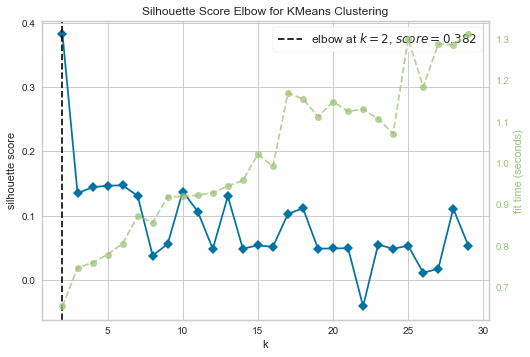

In [177]:
elbow_knee(biotargets_df, KMeans(), 30)

In [200]:
kmeans = KMeans(n_clusters=2, random_state=42)

cluster_targets = biotargets_df.copy(deep=True)
cluster_targets['cluster'] = kmeans.fit_predict(biotargets_df)

print("The lowest SSE value:",kmeans.inertia_,"\n\n", 
      "Final locations of the centroid:","\n",kmeans.cluster_centers_,"\n\n",
      "The number of iterations required to converge:",kmeans.n_iter_)

The lowest SSE value: 8386.668302257118 

 Final locations of the centroid: 
 [[2.16840434e-19 2.16840434e-19 8.67361738e-19 ... 4.33680869e-19
  1.73472348e-18 2.16840434e-19]
 [9.81354269e-04 9.81354269e-04 4.90677134e-03 ... 2.94406281e-03
  7.85083415e-03 9.81354269e-04]] 

 The number of iterations required to converge: 16


In [201]:
pca = pd.DataFrame(PCA(n_components=2).fit_transform(biotargets_df), columns= ["PC1","PC2"])

In [202]:
pca

,PC1,PC2
0,-0.310511,0.213442
1,-0.270234,0.201771
2,-0.474279,0.162218
3,0.018158,-0.022192
4,0.177521,-0.840846
...,...,...
1096,0.187946,-0.393315
1097,-0.422368,-0.594998
1098,-0.495152,0.144268
1099,-0.370223,0.203413


In [217]:
pca_targets = pd.concat([pca.reset_index(drop=True), cluster_targets.reset_index(drop=True)], axis=1)
pca_targets = pd.concat([mlabels_df.reset_index(drop=True), pca_targets.reset_index(drop=True)], axis=1)
pca_targets

,Molecules,PC1,PC2,5HTR1D,AADAC,AAK1,ABAT,ABCB1,ABCB11,ABCB1A,...,VIM-2,VKORC1,VRK2,WEE1,WEE2,XBP1,XDH,YES1,ZAP70,cluster
0,PDFDA0001,-0.310511,0.213442,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,PDFDA0002,-0.270234,0.201771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,PDFDA0003,-0.474279,0.162218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,PDFDA0004,0.018158,-0.022192,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,PDFDA0005,0.177521,-0.840846,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,PDFDA1097,0.187946,-0.393315,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1097,PDFDA1098,-0.422368,-0.594998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1098,PDFDA1099,-0.495152,0.144268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1099,PDFDA1100,-0.370223,0.203413,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**2 Clusters - SLCO1B1**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

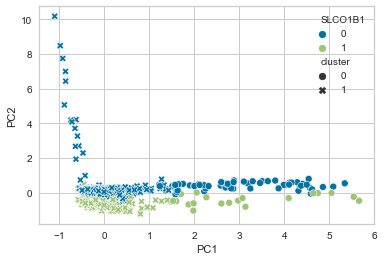

In [284]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B1", style="cluster")

**2 cluster - SLCO1B3**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

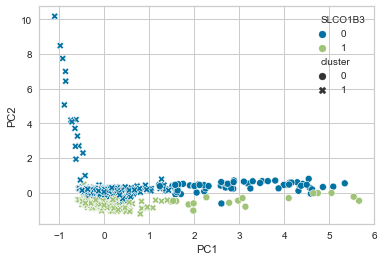

In [285]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B3", style="cluster")

**2 Clusters - 	REP**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

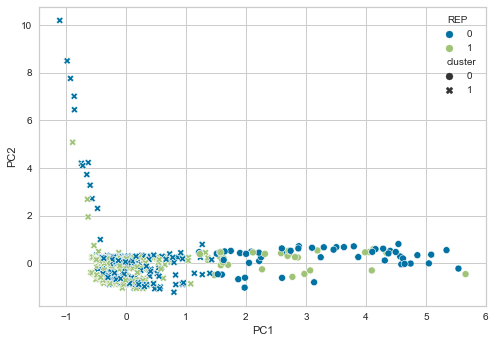

In [251]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "REP", style="cluster")

**2 Clusters - LMNA**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

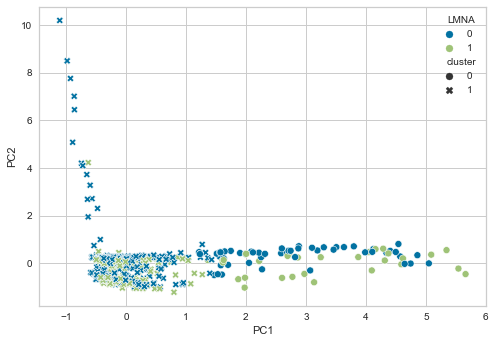

In [252]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "LMNA", style="cluster")

**SLCO1B1 Vs. SLCO1B3**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

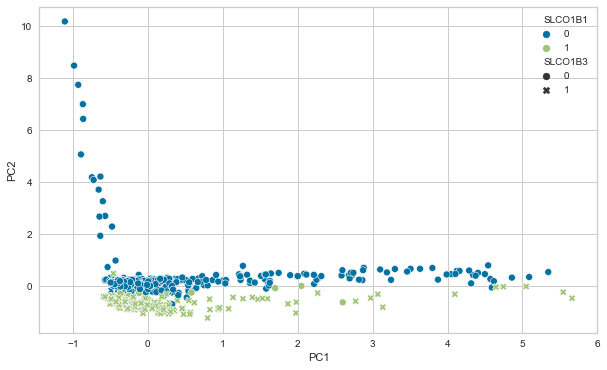

In [253]:
plt.figure(figsize=(10,6))
# fig = sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B1", style="SLCO1B3")

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y'], str(point['val']), size='small')

# label_point(pca_targets.PC1, pca_targets.PC2, pca_targets.Molecules, fig) 

sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B1", style="SLCO1B3")

**REP Vs. LMNA**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

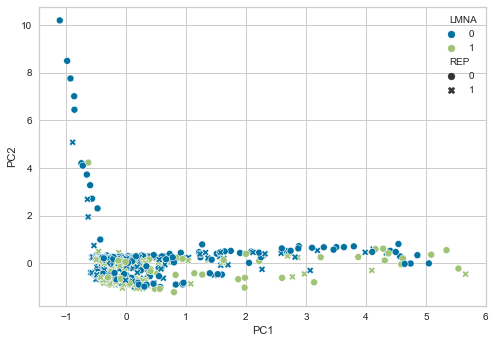

In [254]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "LMNA", style="REP")

**SLCO1B1 Vs. REP**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

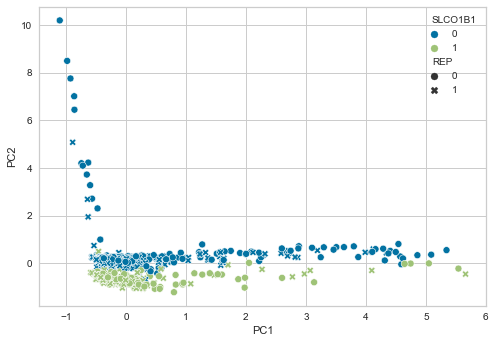

In [255]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B1", style="REP")

**SLCO1B3 Vs. REP**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

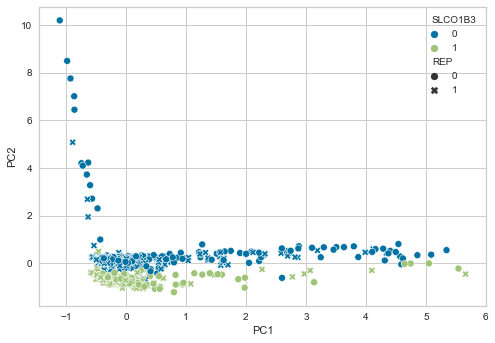

In [256]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B3", style="REP")

**SLCO1B1 VS. LMNA**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

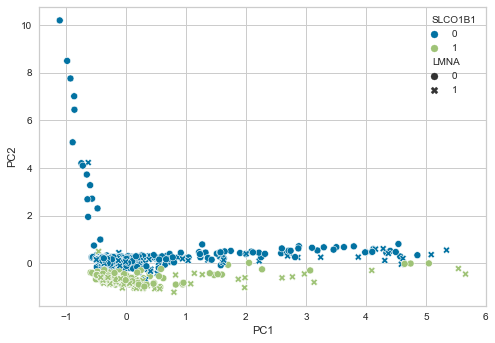

In [258]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B1", style="LMNA")

**SLCO1B3 VS. LMNA**

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

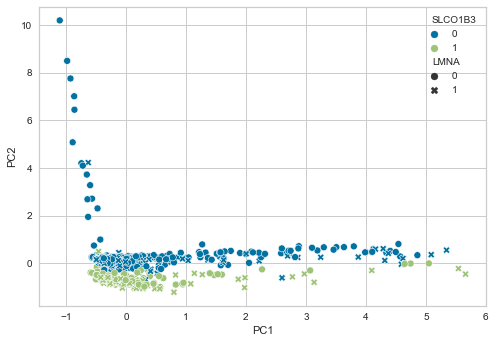

In [257]:
sns.scatterplot(data = pca_targets, x = "PC1", y = "PC2", hue = "SLCO1B3", style="LMNA")